In [3]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
# read data
data = pd.read_csv("CA.csv")
#print(data)

In [26]:
# Linear regression on 10 other factors
# let other 10 features be predictors X, solar be Y
all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][0:55]
all_y = data[['SOEGP']][0:55]
# check where the solar data is non-zero
for i in range(55):
    if data['SOEGP'][i] ==0:
        pass
    else:
        print(i,data['SOEGP'][i])
        break
        
# reset the data to start at non-zero
all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][23:55]
all_y = data[['SOEGP']][23:55]
# split data for train and test
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.3)
#print(test_x)

24 5.0


     SOEGP
35   497.0
40   493.0
44   571.0
47   557.0
25    11.0
53  3727.0
31   471.0
42   554.0
24     5.0
45   537.0
          Pred   SOEGP
0   766.751680   497.0
1  1030.438567   493.0
2  1037.426794   571.0
3  3721.999722   557.0
4  1555.675616    11.0
5  4231.483371  3727.0
6  -893.312286   471.0
7   822.298490   554.0
8  -134.080377     5.0
9  -977.191935   537.0


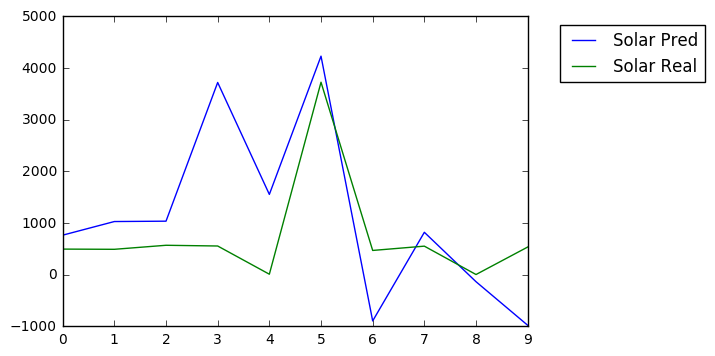

In [28]:
# Use normal linear regression do train and test
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print(test_y)
res_df = pd.DataFrame(regr.predict(test_x))
test_y.index = range(10)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

          Pred   SOEGP
0   764.142228   497.0
1  1030.723689   493.0
2  1040.490473   571.0
3  3666.882613   557.0
4  1532.350089    11.0
5  4234.018593  3727.0
6  -885.107198   471.0
7   821.986333   554.0
8  -145.987159     5.0
9  -964.656722   537.0


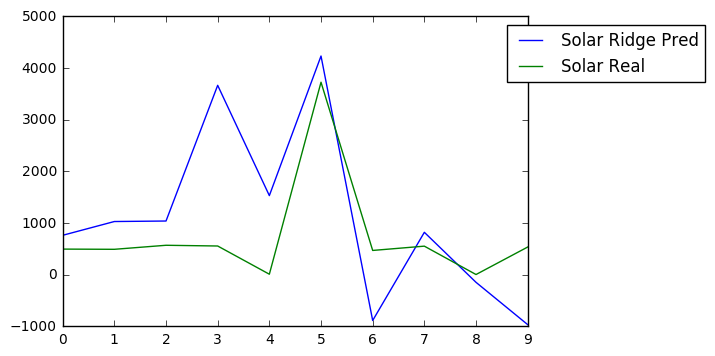

In [29]:
# Use Ridge regression do train and test
regr = linear_model.Ridge(alpha = 0.75)
regr.fit(train_x, train_y)
#print(test_y)
res_df = pd.DataFrame(regr.predict(test_x))
test_y.index = range(10)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Ridge Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


          Pred   SOEGP
0   706.955676   497.0
1  1035.150805   493.0
2  1024.252868   571.0
3  3485.992658   557.0
4  1508.817694    11.0
5  4231.484974  3727.0
6  -878.057849   471.0
7   826.421224   554.0
8   -74.502255     5.0
9 -1041.238766   537.0


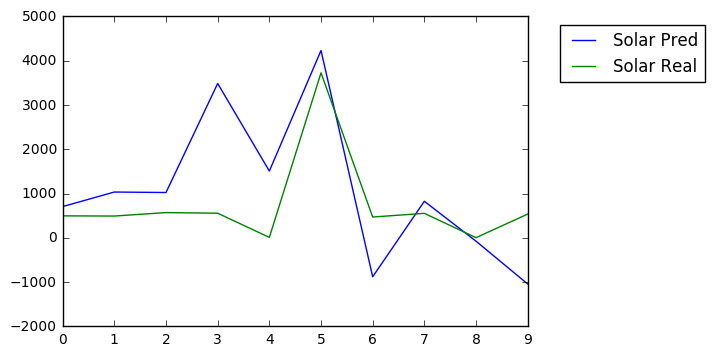

In [30]:
# Use Lasso regression do train and test
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=2)
lasso.fit(train_x, train_y)

#print(test_y)
res_df = pd.DataFrame(lasso.predict(test_x))
test_y.index = range(10)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

    Pred   SOEGP
0  498.5   497.0
1  498.5   493.0
2  498.5   571.0
3  498.5   557.0
4  498.5    11.0
5  498.5  3727.0
6  498.5   471.0
7  498.5   554.0
8  498.5     5.0
9  498.5   537.0


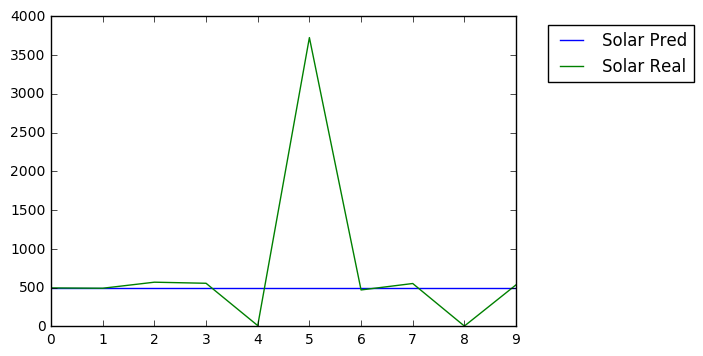

In [31]:
# SVM prediction
from sklearn.svm import SVR
from sklearn import cross_validation
# SVR for solar in CA
clf = SVR(kernel='sigmoid', C=99.0, epsilon=0.1)
svr = clf.fit(train_x, train_y)
scores = cross_validation.cross_val_score(clf, train_x, train_y, cv=5)

res_df = pd.DataFrame(svr.predict(test_x))
test_y.index = range(10)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()